# Chapter 4: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果を `neko.txt.mecab` というファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は`matplotlib`もしくは`Gnuplot`を用いるとよい．


めかぶのバージョン

In [1]:
!mecab -v

mecab of 0.996



"すもももももももものうち" を形態素解析してみるテスト

In [2]:
!echo "すもももももももものうち" | mecab

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
EOS


ウェブから取ってきた`neko.txt`を形態素解析

In [3]:
!cat ./data/chapter04/neko.txt | mecab -o ./data/chapter04/neko.txt.mecab

### 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

Mecabの出力フォーマットとしては以下のようになっている。

    表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

ここから表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）を抜き出してこれば良い

In [4]:
import re

neko = []
with open('./data/chapter04/neko.txt.mecab', 'r') as f:
    sentence = []
    while True:
        line = f.readline().strip('\n')
        if not line:
            break

        if line != "EOS":
            word = re.split('\t|,', line)
            sentence.append({
                'surface': word[0],
                'base': word[7],
                'pos': word[1], 
                'pos1': word[2], 
            })
        else:
            neko.append(sentence)
            sentence = []
            
neko[:20]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}],
 [],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'po

### 31. 動詞

動詞の表層形をすべて抽出せよ．

In [5]:
for sentence in neko[:50]:
    if not sentence:
        continue
    for word in sentence:
        if word['pos'] == '動詞':
            print(word['surface'])

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
煮
食う
思わ
載せ
られ
持ち上げ
られ
し
あっ
落ちつい
見
見
思っ
残っ
いる
さ
れ
し
逢っ
出会わ
し
のみ
なら
し
いる
吹く
せ
弱っ
飲む
知っ
坐っ
おっ
する
し
始め
動く
動く
分ら
廻る
なる
助から
思っ
いる
さり
し
出
し
いる
考え出そ
分ら
付い
見る
い
おっ
見え
隠し
しまっ
違っ
明い
い
られ
這い出し
見る
棄て
られ
這い出す
ある
坐っ
し
考え
見
出
し
泣い
来
くれる
考え付い
やっ
見
来
渡っ
かかる
減っ
来
泣き
出
ある
ある
し
そろ
廻り
始め
し
這っ
行く
出
這入っ
なる
思っ
崩れ
もぐり込ん
破れ
い
し
知れ
云っ
至る
する
なっ
いる


### 32. 動詞の原形

動詞の原形をすべて抽出せよ．

In [6]:
for sentence in neko[:50]:
    if not sentence:
        continue
    for word in sentence:
        if word['pos'] == '動詞':
            print(word['base'])

生れる
つく
する
泣く
する
いる
始める
見る
聞く
捕える
煮る
食う
思う
載せる
られる
持ち上げる
られる
する
ある
落ちつく
見る
見る
思う
残る
いる
する
れる
する
逢う
出会う
する
のむ
なる
する
いる
吹く
する
弱る
飲む
知る
坐る
おる
する
する
始める
動く
動く
分る
廻る
なる
助かる
思う
いる
さる
する
出る
する
いる
考え出す
分る
付く
見る
いる
おる
見える
隠す
しまう
違う
明く
いる
られる
這い出す
見る
棄てる
られる
這い出す
ある
坐る
する
考える
見る
出る
する
泣く
来る
くれる
考え付く
やる
見る
来る
渡る
かかる
減る
来る
泣く
出る
ある
ある
する
そる
廻る
始める
する
這う
行く
出る
這入る
なる
思う
崩れる
もぐり込む
破れる
いる
する
知れる
云う
至る
する
なる
いる


### 33. サ変名詞

サ変接続の名詞をすべて抽出せよ．

In [7]:
# 重すぎて死ぬので100個だけ
for sentence in neko[:100]:
    if not sentence:
        continue
    for word in sentence:
        if word['pos'] == '名詞' and word['pos1'] == 'サ変接続':
            print(word)

{'surface': '見当', 'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '記憶', 'base': '記憶', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '話', 'base': '話', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '装飾', 'base': '装飾', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '突起', 'base': '突起', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '運転', 'base': '運転', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '記憶', 'base': '記憶', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '分別', 'base': '分別', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '決心', 'base': '決心', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '我慢', 'base': '我慢', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '餓死', 'base': '餓死', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '訪問', 'base': '訪問', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '始末', 'base': '始末', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '猶予', 'base': '猶予', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '遭遇', 'base': '遭遇', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '我慢', 'base': '我慢', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '記憶', 'base': 

### 34. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ

In [8]:
for sentence in neko[:100]:
    if not sentence:
        continue
    for i, word in enumerate(sentence):
        if i == 1 or i == (len(sentence)-1):
            continue

        if sentence[i-1]['pos'] == '名詞' and word['base'] == 'の' and sentence[i+1]['pos'] == '名詞':
            print(sentence[i-1]['surface'], word['surface'], sentence[i+1]['surface'])

彼 の 掌
書生 の 顔
はず の 顔
顔 の 真中
穴 の 中
書生 の 掌
掌 の 裏
何 の 事
藁 の 上
笹原 の 中
池 の 前
池 の 上
垣根 の 穴
隣家 の 三
時 の 通路
一刻 の 猶予
家 の 内
彼 の 書生
以外 の 人間
前 の 書生
おさん の 隙
おさん の 三
胸 の 痞
家 の 主人
主人 の 方
鼻 の 下
吾輩 の 顔
自分 の 住
吾輩 の 主人
うち の もの
彼 の 書斎
本 の 上
皮膚 の 色
本 の 上
彼 の 毎夜
以外 の もの
主人 の 傍
彼 の 膝
膝 の 上
経験 の 上
飯櫃 の 上
炬燵 の 上


### 36. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ

In [9]:
from collections import Counter

words = []
for sentence in neko:
    if not sentence:
        continue
    for word in sentence:
        words.append(word['surface'])
        
sorted(Counter(words).items(), key=lambda count: count[1], reverse=True)[:50]

[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988),
 ('で', 3806),
 ('「', 3231),
 ('」', 3225),
 ('も', 2479),
 ('ない', 2390),
 ('だ', 2363),
 ('し', 2322),
 ('から', 2032),
 ('ある', 1728),
 ('な', 1613),
 ('ん', 1568),
 ('か', 1530),
 ('いる', 1249),
 ('事', 1207),
 ('へ', 1034),
 ('う', 992),
 ('する', 992),
 ('もの', 981),
 ('君', 973),
 ('です', 973),
 ('云う', 937),
 ('主人', 932),
 ('よう', 696),
 ('ね', 683),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('なる', 531),
 ('さ', 514),
 ('よ', 509),
 ('なら', 483),
 ('吾輩', 481),
 ('い', 478),
 ('ます', 458),
 ('じゃ', 448)]

### 37. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<BarContainer object of 10 artists>

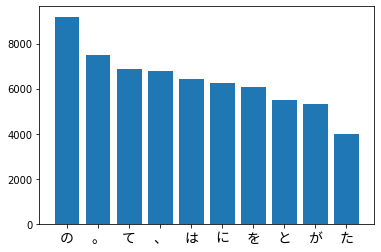

In [10]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
%matplotlib inline 
fp = FontProperties(fname=r'../font/NotoSansCJKjp-Regular.otf', size=14)

x = range(10)
label_words, label_count = zip(*Counter(words).most_common(10))

plt.xticks(x, label_words, fontproperties=fp)
plt.bar(x, label_count)

### 38. ヒストグラム

単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

Text(0, 0.5, '単語の種類数')

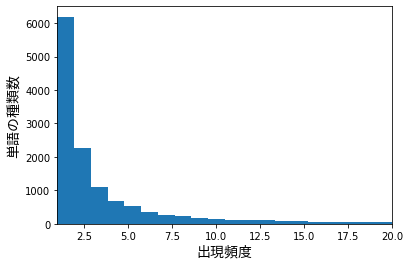

In [11]:
_, counts = zip(*Counter(words).most_common())
plt.hist(counts, bins=20, range=(1, 20))

plt.xlim(xmin=1, xmax=20)
plt.xlabel('出現頻度', fontproperties=fp)
plt.ylabel('単語の種類数', fontproperties=fp)

### 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

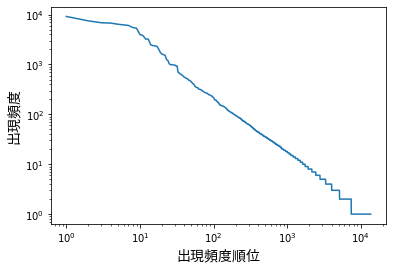

In [12]:
plt.xlabel('出現頻度順位', fontproperties=fp)
plt.ylabel('出現頻度', fontproperties=fp)

plt.loglog(range(1, len(counts) + 1), counts)